#Exploratory Data Analysis (EDA) on Titanic dataset

---
##**Abstract:**

A study in 2016 found that human beings are collectively generated data more than ten exabytes, or 5x1018 bytes from various sources (Lyman and Varian 2003). The transport industry is one of the most significant bodies as a source and user of all that data. Travelling has always been one of the essential activities in our daily lives. Everytime people and their possessions (or even just the cargo) travel an extensive amount of recording is carried out. Contact informtion, origin and destination, travelling preferences, and so on. This data accomodates patterns and heuristics used for decision making. Exploratory Data Analysis (EDA) detects mistakes, finds appropriate data, checks assumptions, and determines correlation between explanatory variables.

EDA is a method to -
*   analyze data using advanced techniques to expose hidden structure
*   enhance the insight into a given dataset
*   identify the anomalies
*   build parsimonious models to test the underlying assumptions

EDA is classified into graphical or non-graphical and univariate or multivariate. Univariate data considers one data column at at time while multivariate considers more than 2 variables while analyzing.

##**Data Source:**

The analysis is carried out using a [publically available data from the Titanic shipwreck](https://www.kaggle.com/c/titanic/data). The dataset(split into 2 datasets: train and test) train holds 891 records with 12 attributes such as PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare and Cabin. Test dataset holds 418 records with 11 columns.

###**Data Dictionary:**
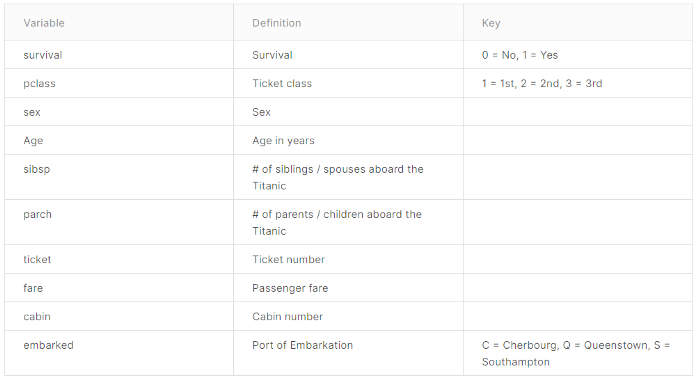

### Installation and setup
Please Note that the setup is automatic as long as you have **python installed on your system and pip along with it**.

In [ ]:
# Installing the libraries
!pip install pandas seaborn matplotlib

# importing the dataset and libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Reading the data into a dataframe
TitanicTrainData = pd.read_csv("train.csv")
TitanicTestData = pd.read_csv("test.csv")

def ConcatDF(df1, df2):
  return pd.concat([df1, df2], sort=True).reset_index(drop=True)

def DivideDF(df):
  return df.loc[:890], df.loc[891:].drop(['Survived'], axis=1)

#Titanic = ConcatDF(TitanicTrainData, TitanicTestData)
Titanic = pd.read_csv("train.csv")

##Basic schema of the dataset:

In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###Numerical Description of the dataset:

In [ ]:
Titanic.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###A glimpse of the dataset:

In [ ]:
Titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Summation of null values in each attribute:

In [ ]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##**Cleaning the dataset**
As seen previously, 
1. 'Age' has 177 missing values (i.e. 20% of values in 'Age' are missing)
2. Cabin has 687 missing values (i.e. 77% of values in 'Cabin' are missing)
3. Finally, 'Embarked' has 2 missing values

In the cleaned dataset the attribute age has several NULL values. Since it is a key attribute, we will impute it. That can be done by using the mean age to replace the NULL values.

Using the mean of all values in the 'Age' column to replace the NULL values will cause variations. To reduce the variations caused by imputing we will select entries from the dataset in key groups (i.e. 'Pclass' and 'Sex') and calculate the mean 'Age' of entries in these groups.

Mean for 'Age' seperated by 'Pclass' and 'Sex':

In [ ]:
display(Titanic.groupby(['Pclass', 'Sex'])['Age'].mean())

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

###Imputing 'Age'

In [ ]:
TitanicCleaned = Titanic.copy()
TitanicCleaned['Age'] = TitanicCleaned.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))

A glimpse of the cleaned dataset:

In [ ]:
TitanicCleaned.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.00,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.00,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.00,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.7500,NaN,Q


##**EDA with Data Visualization**
---
First we calculate the total survivors

In [ ]:
TitanicCleaned['Survived'].sum()

342

###Using various plots to analyze survival based on 'Pclass', 'Sex' and 'Age'.

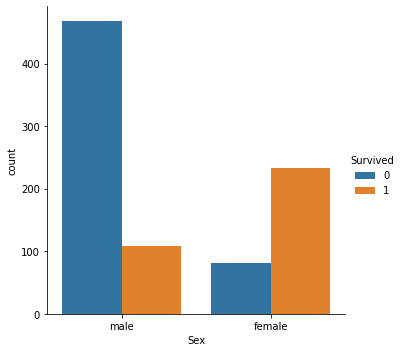

In [ ]:
sns.catplot(x='Sex', hue='Survived', kind='count', data=TitanicCleaned)

The above graph indicates that the survival rate of the female passengers is significantly higher when compared to the male passengers. This indicates that the rescue team might have priortized saving the female passengers.

Below is the numerical representation of the same analysis.

In [ ]:
TitanicCleaned.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

###Using a heatmap for the same analysis:

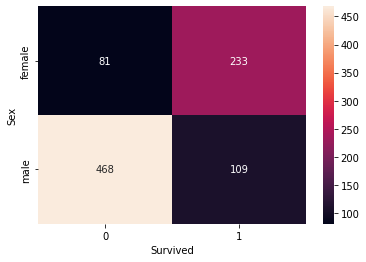

In [ ]:
Group1 = TitanicCleaned.groupby(['Sex','Survived'])
GenderSurvived = Group1.size().unstack()
sns.heatmap(GenderSurvived, annot=True, fmt='d')

###Analyzing survival of passengers of different 'Pclass' using heatmap.

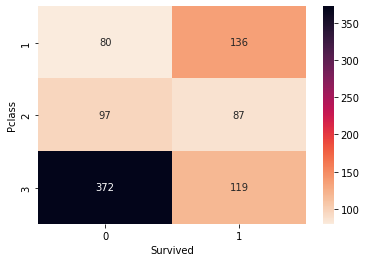

In [ ]:
Group2 = TitanicCleaned.groupby(['Pclass', 'Survived'])
ClassSurvived = Group2.size().unstack()
cmap = sns.cm.rocket_r #inverted color map
sns.heatmap(ClassSurvived, annot=True, fmt='d', cmap=cmap)

The above results indicate that the rescue team might have priortized rescuing members of the upper class.


Next we analyze the survival rates of the passengers based on 'Sex' and 'Age' using a Violin Plot:

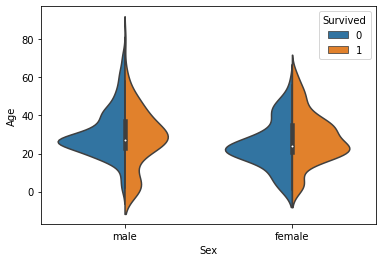

In [ ]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=TitanicCleaned, split=True)

The above result indicates:
* Most passengers of the Titanic belonged to the age group between 20 and 40, with the male passengers strongly indicating this observation while the female passengers do not show a similar disribution as their data points seem to be relatively a bit more evenly distributed.
* The rescue team managed to save many male passengers under 20 when compared to the female passengers of the same age group.
* The age group 0 to 20 is more populated when compared to the data points depicting passengers aged above 40. This (coupled with the previously mentioned observation) indicates that a younger group of people boarded the Titanic.


###Analyzing survival rates based on 'Pclass' and 'Age' using Violin Plot:

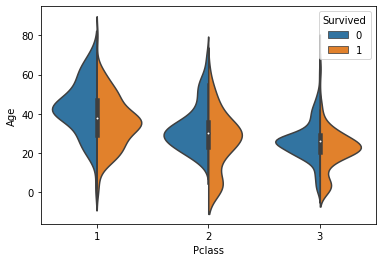

In [ ]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=TitanicCleaned, split=True)

The above result indicates:
* most First Class passengers were older than 40, this also indicates that most wealthy people of the time must have been much elder than the youth of the time.
* the First Class passengers seem to represent a wider age group of people when comapred to passengers of other 2 class which show very dense population of data points in the age group 20-40.